## Part A: Sentiment Analysis

#### Exercise: Sentiment distribution.

- Download the LabMT wordlist. It's available as supplementary material from Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter (Data Set S1). Describe briefly how the list was generated.
- Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
- Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
- Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
- Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
- Who are the 10 artists with happiest and saddest pages?

In [2]:
# read the LabMT word list from the file "Hedonometer.csv"
import csv
def read_labmt_word_list(filename="/Users/iben/Desktop/Social_graphs/SocialGraphs/Hedonometer.csv"):
    labmt_words = {}
    with open(filename, 'r', encoding='utf-8') as csvfile:
        # Use DictReader to make the code more readable and less prone to column index errors
        reader = csv.DictReader(csvfile)
        for row in reader:
            word = row["Word"]
            # Store all information in a nested dictionary
            labmt_words[word] = {
                "rank": int(row["Rank"]),
                "happiness_score": float(row["Happiness Score"]),
                "std_dev": float(row["Standard Deviation of Ratings"])
            }
    return labmt_words

LabMT_word_list = read_labmt_word_list()

print(LabMT_word_list["happy"])  # Example usage

{'rank': 3, 'happiness_score': 8.3, 'std_dev': 0.99}


#### punkt 1

"For the evaluations, we asked users on Mechanical Turk to rate how a given word made them feel on a nine point integer scale, obtaining 50 independent evaluations per word. We broke the overall assignment into 100 smaller tasks of rating approximately 100 randomly assigned words at a time. We emphasized the scores 1, 3, 5, 7, and 9 by stylized faces, representing a sad to happy spectrum. Such five point scales are in widespread use on the web today (e.g., Amazon) and would likely be familiar with users. The four intermediate scores of 2, 4, 6, 8 allowed for fine tuning of assessments. In using this scheme, we remained consistent with the 1999 Affective Norms for English Words (ANEW) study by Bradley and Lang [55], the results of which we used in constructing our initial metric"

#### punkt 2

Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).

In [3]:
def calculate_sentiment(tokens, labmt_words):
    total_score = 0
    count = 0
    for token in tokens:
        if token in labmt_words:
            total_score += labmt_words[token]["happiness_score"]
            count += 1
    if count == 0:
        return 0  # Avoid division by zero; return neutral sentiment
    return total_score / count, count



test_tokens = ["happy", "sad", "joyful", "angry", "ggg", "light", "better"]
sentiment_score, valid_word_count = calculate_sentiment(test_tokens, LabMT_word_list)
print(f"Sentiment score: {sentiment_score}, Valid word count: {valid_word_count}")

test2_tokens = ["happy", "wonderful", "sad", "amazing"]
sentiment_score2, valid_word_count2 = calculate_sentiment(test2_tokens, LabMT_word_list)
print(f"Sentiment score: {sentiment_score2}, Valid word count: {valid_word_count2}")


Sentiment score: 5.279999999999999, Valid word count: 5
Sentiment score: 6.525, Valid word count: 4


#### punkt 3 
Iterage over the nodes in your network, tokenize each wikipage, and calculate sentiment every single page. Now you have sentiment as a new nodal property.

Number of nodes: 488
Number of edges: 7177
First 5 nodes: ['10cc', '10_Years_(band)', '3_Doors_Down', '311_(band)', '38_Special_(band)']
First 5 edges: [('10cc', 'The_Yardbirds'), ('10cc', 'Simon_&_Garfunkel'), ('10cc', 'The_Hollies'), ('10cc', "Herman's_Hermits"), ('10cc', 'Frank_Zappa')]


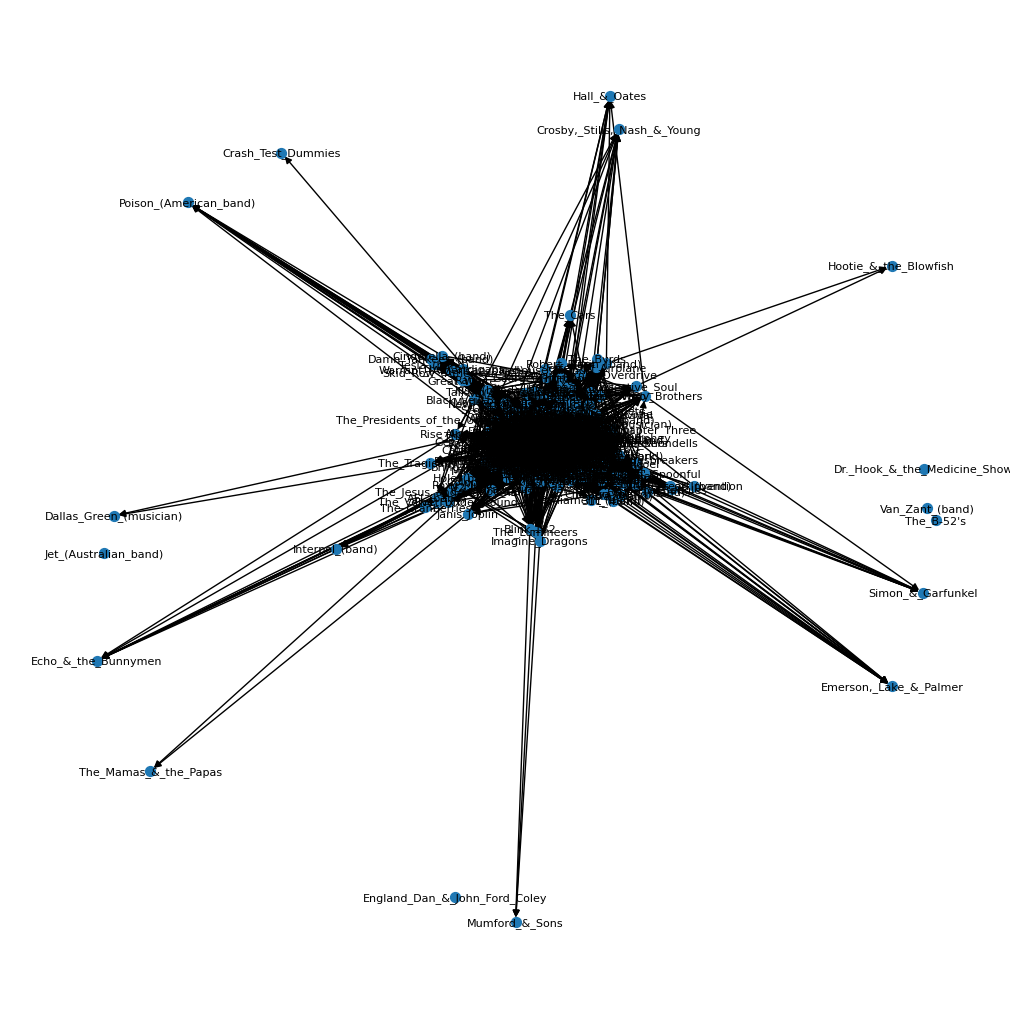

In [5]:
import networkx as nx
import os

# load graph of rock bands
G = nx.read_graphml("/Users/iben/Desktop/Social_graphs/SocialGraphs/Assignment1/rock_music_graph1.graphml")

# visualize basic info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# print first 5 nodes
print("First 5 nodes:", list(G.nodes())[:5])
# print first 5 edges
print("First 5 edges:", list(G.edges())[:5])

# plot graph
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 10))
#nx.draw(G, with_labels=True, node_size=50, font_size=8)
#plt.show()


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize



# path to folder with wiki pages
bands_folder = "/Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands"

# function to sanitize filenames, so that they can be used as valid filenames
def sanitize_filename(name):
    # Replace any character that is not a letter, number, underscore, or hyphen with an underscore
    return re.sub(r'[^\w\-]', '_', name)

for node in G.nodes(data=True):
    node_id = node[0]
    # sanitize file name
    band_name = sanitize_filename(node_id)
    # construct file path
    file_path = os.path.join(bands_folder, f"{band_name}.txt")
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            # tokenize text
            tokens = word_tokenize(text)
            # sentiment score 
            sentiment_score, valid_word_count = calculate_sentiment(tokens, LabMT_word_list)
            # add sentiment score as atribute on node in graph
            G.nodes[node_id]['sentiment'] = sentiment_score
            G.nodes[node_id]['sentiment_word_count'] = valid_word_count

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")



File not found: /Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands/Crosby__Stills__Nash___Young.txt
Error reading /Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands/Emerson__Lake___Palmer.txt: cannot unpack non-iterable int object
Error reading /Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands/England_Dan___John_Ford_Coley.txt: cannot unpack non-iterable int object


In [1]:

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True